# Técnicas de Pré-processamento para OCR

# Importando as bibliotecas

In [63]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pytesseract

%matplotlib inline


# Escala de cinza (*grayscale*)

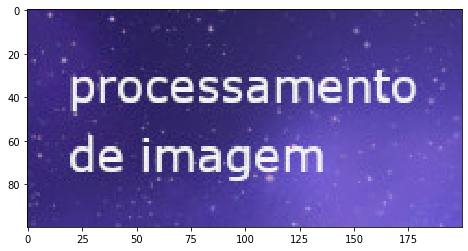

In [29]:
img = cv2.imread('content/img-process.jpg')
plt.figure(figsize = (15,4))
plt.imshow(img, interpolation='nearest')

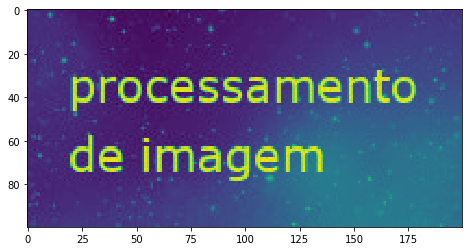

In [32]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (15,4))
plt.imshow(gray, interpolation='nearest')

# Limiarização  (*thresholding*)

## Limiarização Simples (*Threshold*)

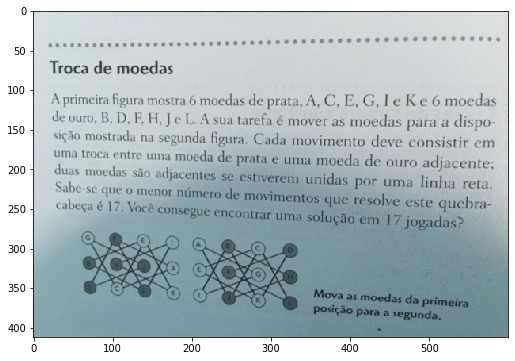

In [35]:
img = cv2.imread('content/livro_adaptativa.jpg')
plt.figure(figsize = (15,6))
plt.imshow(img, interpolation='nearest')

In [68]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pytesseract.image_to_string(gray, lang='por', config=config_tesseract)
print(texto)

Troca de moedas

A primeira figura mostra 6 moedas de prata, A, C, E, G, [e Ke 6 moedas
de ouro, B, D, F, H, Je L. A sua tarefa é mover as moedas para a dispo-
sição mostrada na segunda figura. Cada movimento deve consistir em
uma troca entre uma moeda de prata e uma moeda de ouro adjacente;
duas moedas são adjacentes « idas poi “uma linha reta.
Sabe-se que o menor RR
cabeça é 17, Você aro



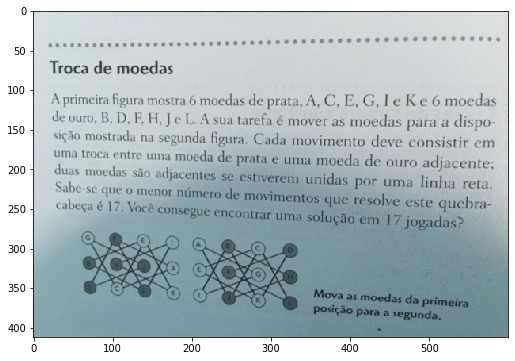

In [69]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (15,6))
plt.imshow(img, interpolation='nearest')
plt.show()

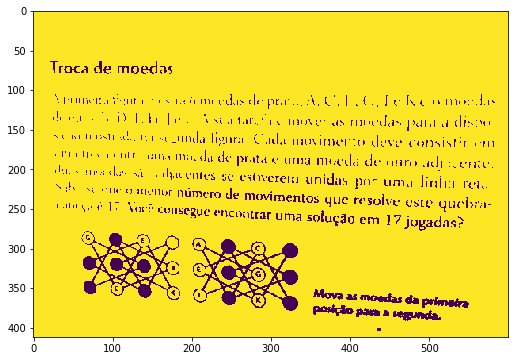

In [70]:
val, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (15,6))
plt.imshow(thresh, interpolation='nearest')

In [ ]:
val

127.0

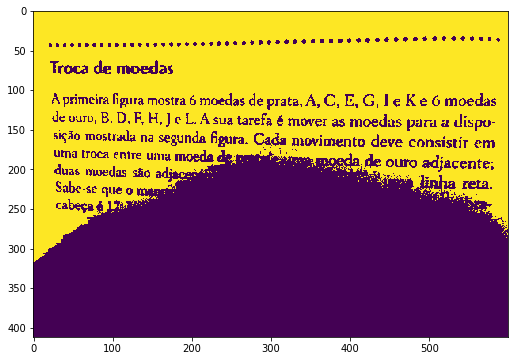

In [71]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (15,6))
plt.imshow(thresh, interpolation='nearest')

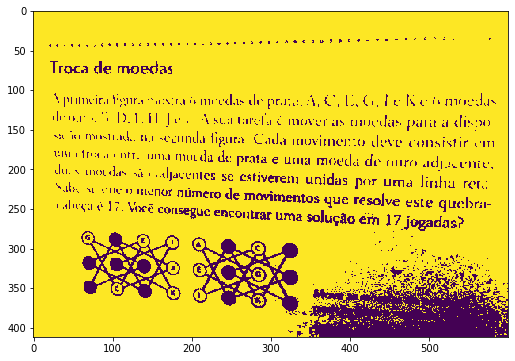

In [22]:
val, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)
plt.figure(figsize = (15,6))
plt.imshow(thresh, interpolation='nearest')

## Método de Otsu

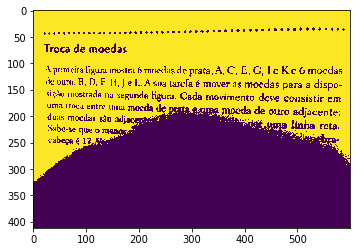

In [23]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, interpolation='nearest')

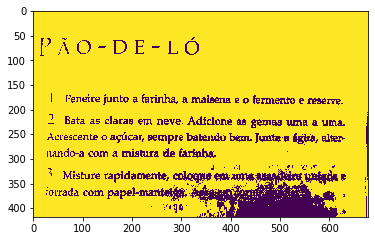

In [27]:
img = cv2.imread('content/receita01.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, interpolation='nearest')

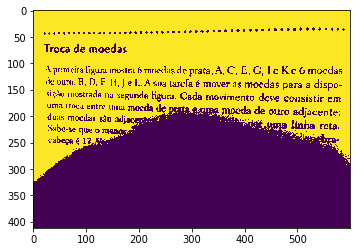

In [72]:
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.imshow(otsu, interpolation='nearest')

## Limiarização Adaptativa

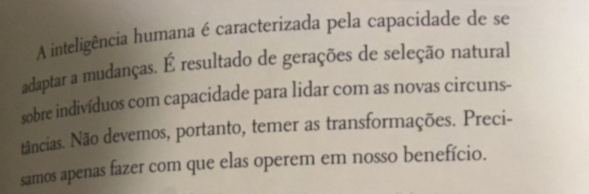

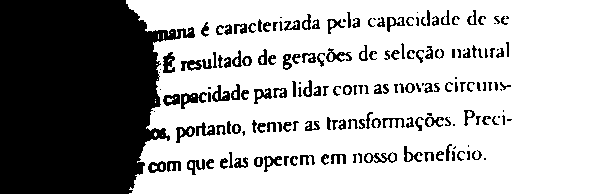

147.0


In [ ]:
img = cv2.imread('/content/livro02.jpg')
cv2_imshow(img)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
val, otsu = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
cv2_imshow(otsu)
print(val)

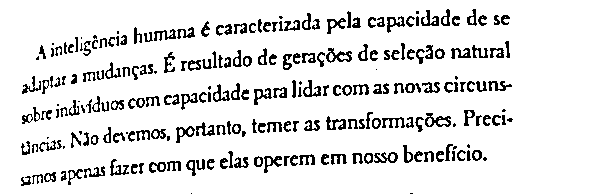

In [ ]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

## Limiarização Adaptativa Gaussiana

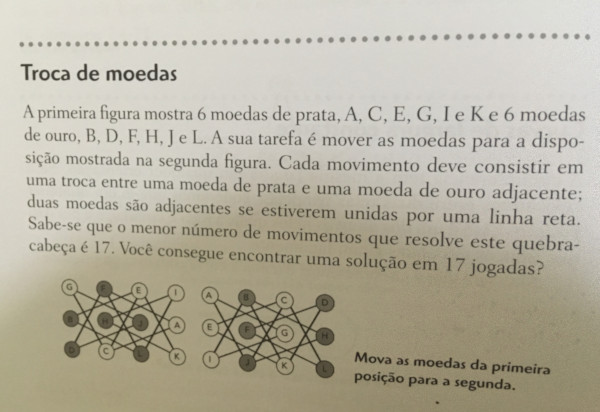

In [ ]:
img = cv2.imread('/content/livro_adaptativa.jpg')
cv2_imshow(img)

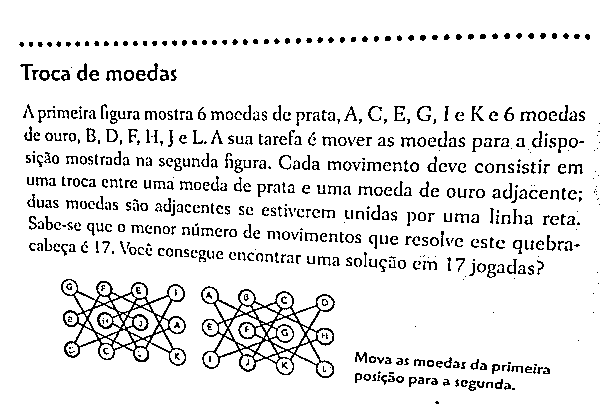

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
adapt_media_gauss = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media_gauss)

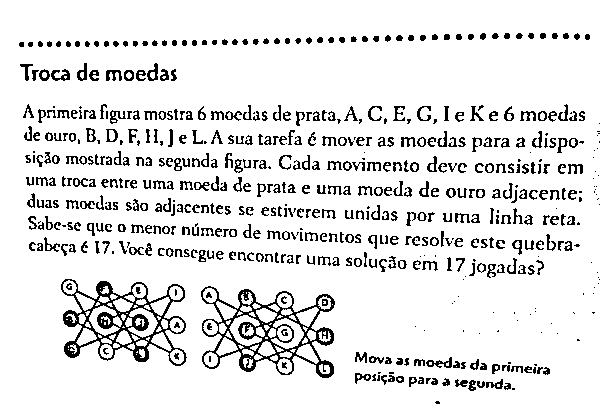

In [ ]:
adapt_media = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 9)
cv2_imshow(adapt_media)

# Inversão

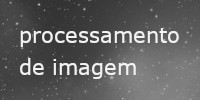

In [ ]:
img = cv2.imread('/content/img-process.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
gray

array([[ 68,  70,  72, ...,  76,  74,  74],
       [ 68,  70,  73, ...,  75,  74,  77],
       [ 70,  70,  72, ...,  74,  73,  76],
       ...,
       [ 67,  69,  82, ..., 123, 123, 124],
       [ 70,  76,  92, ..., 124, 124, 125],
       [ 70,  70,  80, ..., 123, 122, 123]], dtype=uint8)

In [ ]:
invert = 255 - gray

In [ ]:
invert

array([[187, 185, 183, ..., 179, 181, 181],
       [187, 185, 182, ..., 180, 181, 178],
       [185, 185, 183, ..., 181, 182, 179],
       ...,
       [188, 186, 173, ..., 132, 132, 131],
       [185, 179, 163, ..., 131, 131, 130],
       [185, 185, 175, ..., 132, 133, 132]], dtype=uint8)

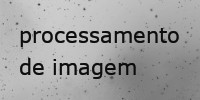

In [ ]:
cv2_imshow(invert)

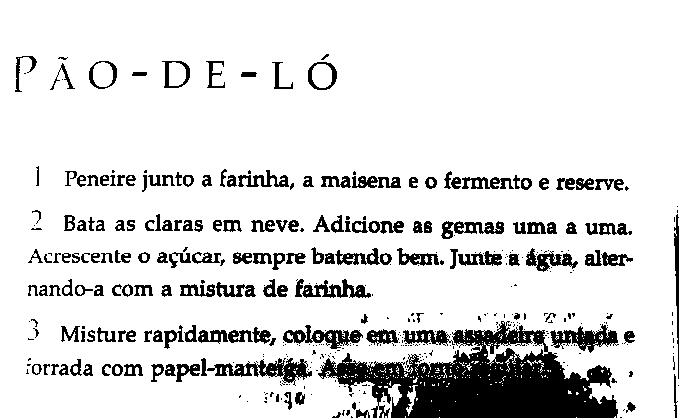

In [ ]:
cv2_imshow(thresh)

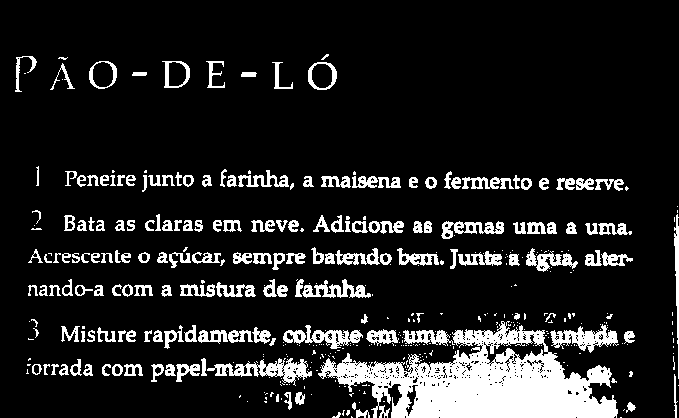

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

# Redimensionamento

- INTER_NEAREST - uma interpolação de vizinho mais próximo. É muito usado por ser o mais rápido.
- INTER_LINEAR - uma interpolação bilinear (é usada por padrão), boa no geral para aumentar e também pra diminuir imagens.
- INTER_AREA - usa a relação de área de pixel. Pode ser um método preferido para a redução de imagens pois fornece resultados sem moiré (efeito geralmente indesejado na imagem). Mas quando a imagem é ampliada, é semelhante ao método INTER_NEAREST.
- INTER_CUBIC - bicúbica (4x4 pixel vizinhos). Possui resultados melhores.
- INTER_LANCZOS4 - interpolação Lanczos (8x8 pixel vizinhos). Dentre esses algoritmos, é o que apresenta resultados com a melhor qualidade.

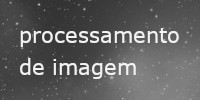

In [ ]:
cv2_imshow(gray)

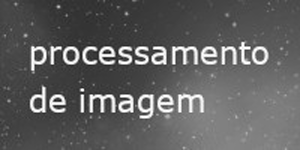

In [ ]:
maior = cv2.resize(gray, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_CUBIC)
cv2_imshow(maior)

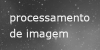

In [ ]:
menor = cv2.resize(gray, None, fx = 0.5, fy = 0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(menor)

# Operações Morfológicas

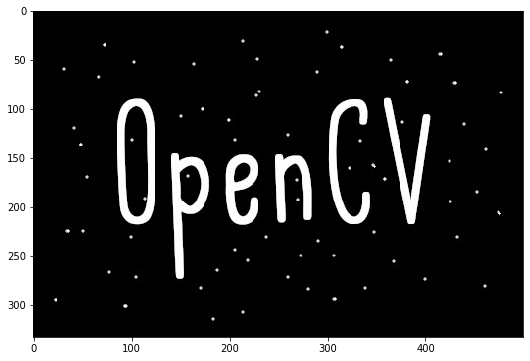

In [77]:
img = cv2.imread('content/texto-opencv.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize = (15,6))
plt.imshow(img, interpolation='nearest')

## Erosão

In [74]:
np.ones((3, 3), np.uint8)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

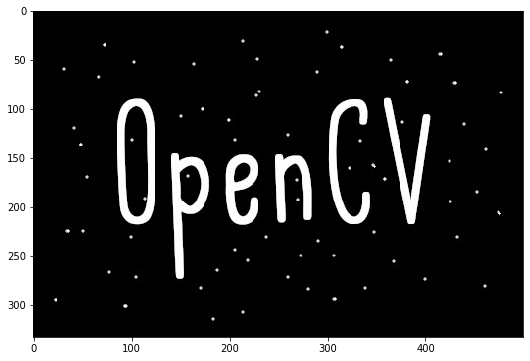

In [78]:
erosao = cv2.erode(gray, np.ones((3, 3), np.uint8))
plt.figure(figsize = (15,6))
plt.imshow(img, interpolation='nearest')

## Dilatação

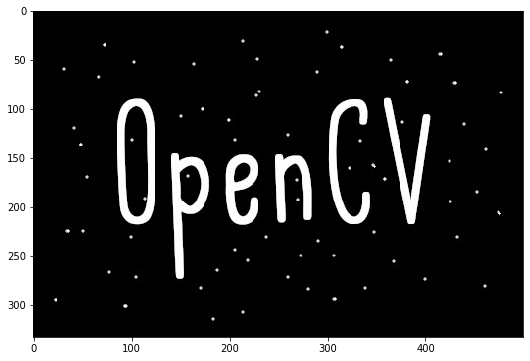

In [79]:
dilatacao = cv2.dilate(gray, np.ones((3,3), np.uint8))
plt.figure(figsize = (15,6))
plt.imshow(img, interpolation='nearest')

## Abertura

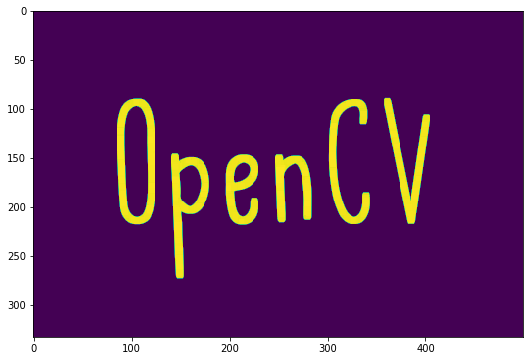

In [80]:
erosao = cv2.erode(gray, np.ones((5, 5), np.uint8))
abertura = cv2.dilate(erosao, np.ones((5,5), np.uint8))
plt.figure(figsize = (15,6))
plt.imshow(abertura, interpolation='nearest')


## Fechamento

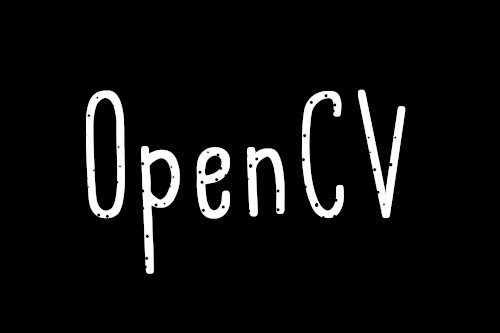

In [ ]:
img = cv2.imread('texto-opencv2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

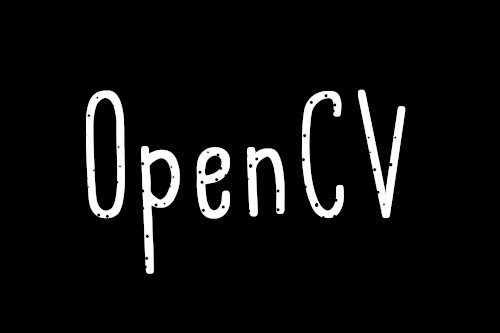

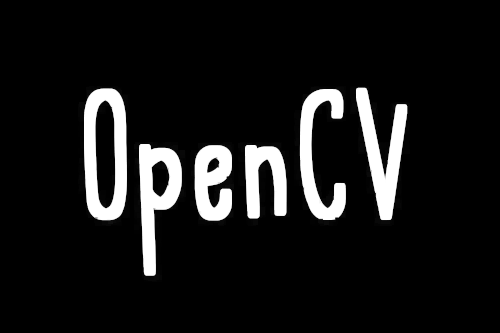

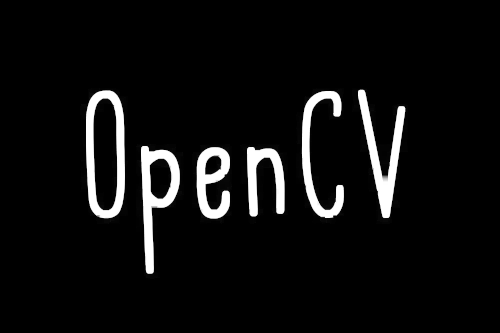

In [ ]:
dilatacao = cv2.dilate(gray, np.ones((5,5)))
fechamento = cv2.erode(dilatacao, np.ones((5,5)))
cv2_imshow(gray)
cv2_imshow(dilatacao)
cv2_imshow(fechamento)

# Remoção de Ruído

## Desfoque com Média

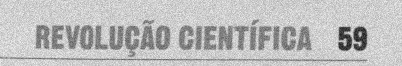

In [ ]:
img = cv2.imread('teste_ruido.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

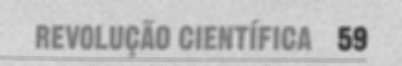

In [ ]:
desfoque_media = cv2.blur(gray, (5,5))
cv2_imshow(desfoque_media)

## Desfoque Gaussiano


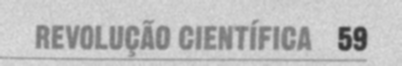

In [ ]:
desfoque_gaussiano = cv2.GaussianBlur(gray, (5, 5), 0)
cv2_imshow(desfoque_gaussiano)

## Desfoque com Mediana

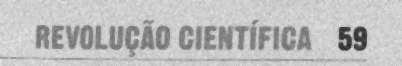

In [ ]:
desfoque_mediana = cv2.medianBlur(gray, 3)
cv2_imshow(desfoque_mediana)

## Filtro bilateral

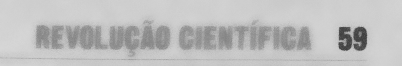

In [ ]:
desfoque_bilateral = cv2.bilateralFilter(gray, 15, 55, 45)
cv2_imshow(desfoque_bilateral)

# Detecção de textos

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
import pytesseract

*Aviso: em setembro de 2021 o link para baixar o **por.traineddata** sofreu uma pequena alteração [ para mais explicações consulte a aula "Resolvendo problema relacionado ao pacote de idiomas" ]*

Portanto, o link final ficou: https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true (segue abaixo o comando completo)

In [ ]:
!mkdir tessdata
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

mkdir: cannot create directory ‘tessdata’: File exists
--2021-10-10 23:00:06--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata [following]
--2021-10-10 23:00:06--  https://github.com/tesseract-ocr/tessdata/raw/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata [following]
--2021-10-10 23:00:06--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

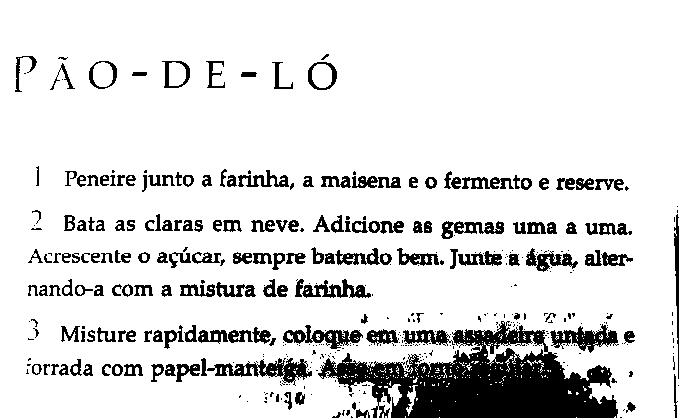

In [ ]:
cv2_imshow(thresh)

In [ ]:
config_tesseract = '--tessdata-dir tessdata'
texto = pytesseract.image_to_string(thresh, lang='por', config=config_tesseract)
print(texto)

PAO-DE-LÓ

| Peneire junto a farinha, a maisena e o fermento e reserve.

2 Bata as claras em neve. Adicione as gemas uma à uma,

Acrescente o açúcar, sempre batendo bem. Junte:àa âgin, alter-
nando-a com a mistura de farlnha.

s
J

 



# Exercício

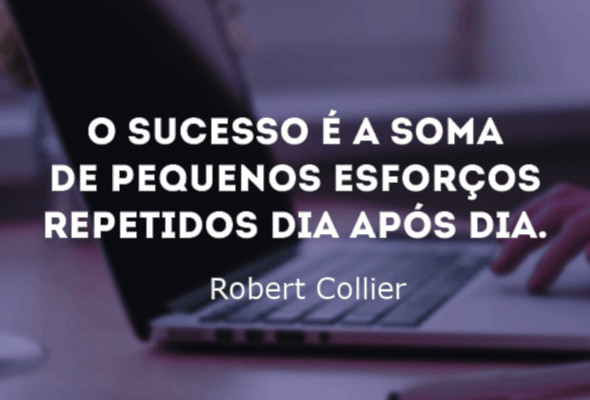

In [ ]:
img = cv2.imread('frase.jpg')
cv2_imshow(img)

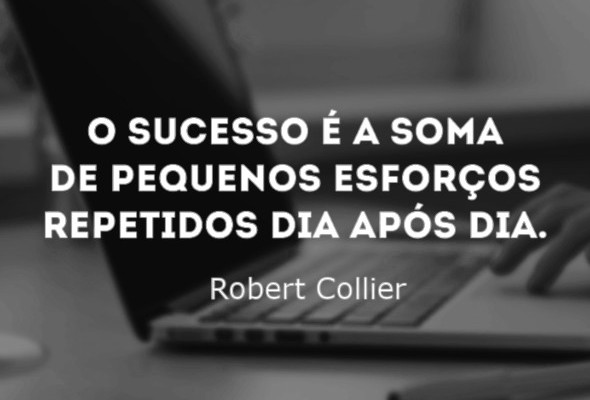

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

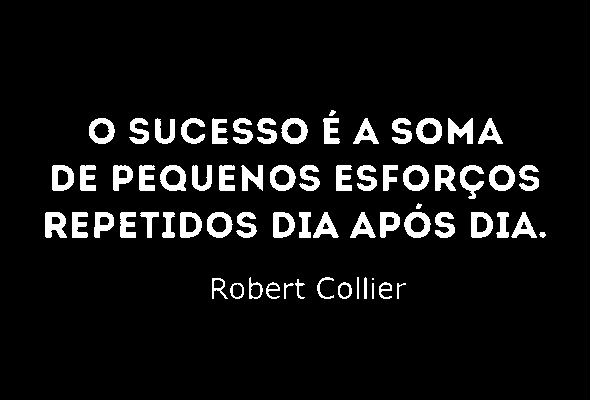

180.0


In [ ]:
val, thresh = cv2.threshold(gray, 180, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
print(val)

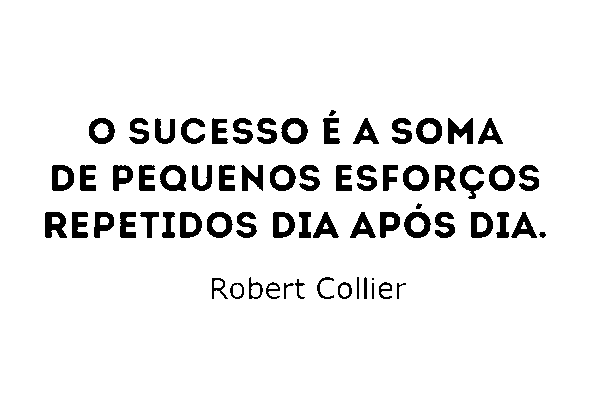

In [ ]:
invert = 255 - thresh
cv2_imshow(invert)

In [ ]:
print(pytesseract.image_to_string(thresh, lang='por', config=config_tesseract))

O SUCESSO É A SOMA
DE PEQUENOS ESFORÇOS
REPETIDOS DIA APÓS DIA.

Robert Collier

